In [11]:
import pkufiber as pf
import yaml 
import torch 
from scripts.train_eq import init_model, check_data_config, DataLoader, test_model

path = 'experiments/80G_3ch_pbc_v1'
with open(path + '/config.yaml') as f: config = yaml.load(f, Loader=yaml.FullLoader)
param_dict = torch.load(path + '/models/1.pth', map_location='cpu')['model_param']
model = init_model(config['model_name'], config['model_info'])
model.load_state_dict(param_dict) 
test_path =  "/home/xiaoxinyu/TorchFiber/dataset_A800/test.h5" 

In [16]:
Q = []
for pch in range(-3, 8):
    data = pf.data.PbcDataset(path=test_path, Nmodes=2, Nch=3, Rs=80, Pch=pch, 
                    window_size=801,  num_symb=100000, truncate=20000)

    dataloader = DataLoader(data, batch_size=20000, shuffle=False)

    Q.append(test_model(model, dataloader, device='cpu')['Qsq'])

In [17]:
import numpy as np
np.save('result/pbc.npy', Q) 

In [2]:
id_model = pf.dsp.nonlinear_compensation.nneq.EqID(M=41)
test_model(id_model, dataloader, device='cpu')

{'MSE': 0.02908763475716114,
 'SNR': 15.35193654699853,
 'BER': 0.0033076002262532713,
 'Qsq': 8.677376664408975}

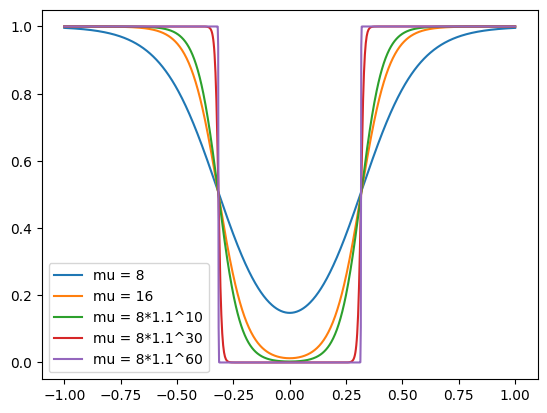

In [25]:
import pkufiber as pf
import pkufiber.dsp.nonlinear_compensation.loss as loss 
import torch 
import matplotlib.pyplot as plt

x = torch.linspace(-1,1,1000)


y_ber = loss.well(x, mu=8*1.1**100)

y1 = loss.well(x, mu=8)
y2 = loss.well(x, mu=16)
y3 = loss.well(x, mu=8*1.1**10)
y4 = loss.well(x, mu=8*1.1**30)
y5 = loss.well(x, mu=8*1.1**60)


# plt.plot(x, y_ber, label='BER')
plt.plot(x, y1, label='mu = 8')
plt.plot(x, y2, label='mu = 16')
plt.plot(x, y3, label='mu = 8*1.1^10')
plt.plot(x, y4, label='mu = 8*1.1^30')
plt.plot(x, y5, label='mu = 8*1.1^60')
plt.legend()

In [33]:
import pkufiber as pf
from pkufiber.dsp.nonlinear_compensation.pbc import  EqAMPBC, EqAMPBCstep
import torch 

x = torch.randn(5, 100, 2, dtype=torch.complex64)
task = torch.randn(5, 4)
model = EqAMPBCstep(M=41, rho=8, fwm_share=True, decision=False)

In [35]:
torch.sum(torch.abs(model(x, task) - x[:,20:-20,:]))

tensor(5.7704e-06, grad_fn=<SumBackward0>)

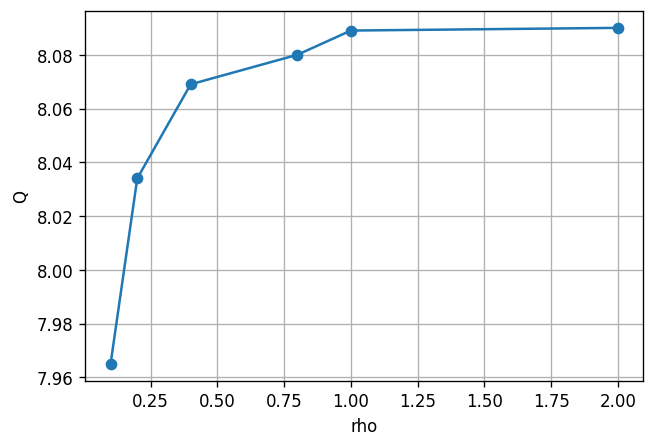

In [6]:
import matplotlib.pyplot as plt


rho = [0.1, 0.2, 0.4, 0.8, 1, 2]

Qs = [7.965, 8.034, 8.069, 8.08, 8.089, 8.09]

plt.figure(figsize=(6,4), dpi=120)
plt.plot(rho, Qs, '-o')
plt.xlabel('rho')
plt.ylabel('Q')
plt.grid()
#plt.savefig('result/rho.png')